<a href="https://colab.research.google.com/github/AnastasiaBrinati/machine_learning/blob/main/excercise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Executed as:
# python deliverable.py <path to training file> <path_to_test_file>

In [ ]:
import numpy as np
import pandas as pd
import sys

In [ ]:
# DA CANCELLARE: NON VA NEL FILE PYTHON
train_file = "hotel_train.csv"

In [ ]:
x = pd.read_csv(train_file)
print(x.shape)

(95512, 30)


In [ ]:
# qua parte il preprocessing che viene fatto giù

In [ ]:
# 'Estraiamo' ora la colonna target, perchè dobbiamo fare lo split,
# ma il pop lo rimandiamo a seguito della gestione dei valori mancanti fatta ** sulle righe **
y = x['is_canceled']
#y = x.pop('is_canceled') # this is the target column
print(y.shape)

(95512,)


In [ ]:
# ------------------------------------------------------------------- TRAIN / TEST SPLIT -----------------------------------------------------------------------------
#estrazione del validation set
from sklearn.model_selection import train_test_split

# seed = 12345
seed = 23456
# seed = 34567
# seed = 45678
# seed = 56789

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.3, random_state=seed, stratify=y)

print(x_tr.shape)
print(y_tr.shape)
print(x_ts.shape)
print(y_ts.shape)

print(np.unique(y, return_counts=True)[1]/len(y))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))
print(np.unique(y_ts, return_counts=True)[1]/len(y_ts))

(66858, 30)
(66858,)
(28654, 30)
(28654,)
[0.62958581 0.37041419]
[0.62958808 0.37041192]
[0.62958051 0.37041949]


In [ ]:
#-------------------------------------------------------------- SOSTITUZIONE VALORI MANCANTI --------------------------------------------------------------

# i valori nan della colonna 'children' sono solo 4, dunque è preferibile direttamente eliminare
# quelle righe invece di introdurre un lggero quanto inutile rumore
x_tr_drop = x_tr.dropna(subset=['children'])
y_tr = x_tr_drop.pop('is_canceled')
x_ts.pop('is_canceled')

print(x_tr_drop.shape)
print(y_tr.shape)
print(x_ts.shape)

(66855, 29)
(66855,)
(28654, 29)


<ipython-input-12-5d78c065fd7f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_tr_drop.corr(), ax=ax, annot=True)


<Axes: >

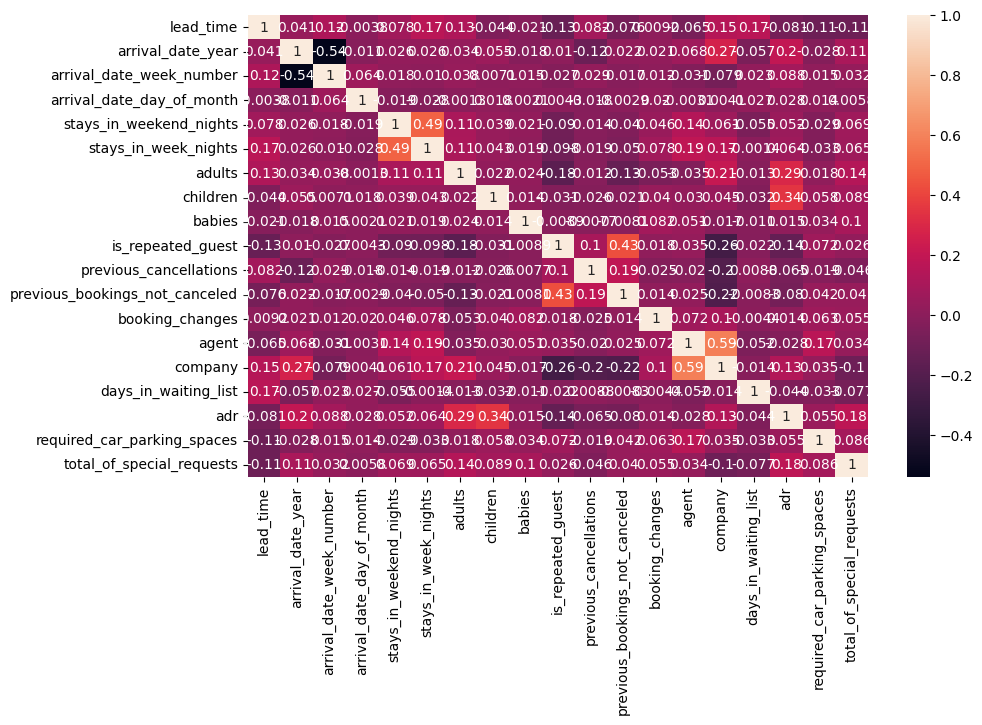

In [ ]:
# --------------------------------------------------------------------- FEATURE IMPORTANCE: ------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(x_tr_drop.corr(), ax=ax, annot=True)

# da questo controllo possiamo notare come mediamente tutte le feature presentano
# lo stesso legame, con pochissime eccezioni,
# per cui non è stato applicato nessun procedimento in questa fase

In [ ]:
#-------------------------------------------------------------- SOSTITUZIONE VALORI MANCANTI --------------------------------------------------------------

from sklearn.impute import SimpleImputer

# la colonna 'company' presenta un numero di righe molto inferiore rispetto al resto del dataset
# per questomotivo il rumore che verrebbe introdotto sarebbe grave
# la decisione ricade sull'eliminare direttamente la colonna
x_tr_drop = x_tr_drop.drop(columns='company')
x_tr_drop.info()

cols = list(x_tr_drop)
print(cols)


# sostituzione valori nan: dato che sono presenti valori categorici, e nello specifico sono proprio
# tre colonne di quel tipo ad avere valori mancanti, abbiamo optato per un semplice Imputer
# che sostituisse con i più frequenti.

imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
x_tr_notnan = imputer.fit_transform(x_tr_drop)


#pd.set_option('display.max_columns',None)
x = pd.DataFrame(x_tr_notnan)
x.columns=cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66855 entries, 91091 to 29896
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           66855 non-null  object 
 1   lead_time                       66855 non-null  int64  
 2   arrival_date_year               66855 non-null  int64  
 3   arrival_date_month              66855 non-null  object 
 4   arrival_date_week_number        66855 non-null  int64  
 5   arrival_date_day_of_month       66855 non-null  int64  
 6   stays_in_weekend_nights         66855 non-null  int64  
 7   stays_in_week_nights            66855 non-null  int64  
 8   adults                          66855 non-null  int64  
 9   children                        66855 non-null  float64
 10  babies                          66855 non-null  int64  
 11  meal                            66855 non-null  object 
 12  country                     

In [ ]:
 #-------------------------------------------------------------------------- ENCODING --------------------------------------------------------------------------

#the following data was obtained from: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
europe = ['ALA', 'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GGY', 'VAT', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SJM', 'SWE', 'CHE', 'UKR', 'GBR']
africa = ['DZA', 'AGO', 'BEN', 'BWA', 'IOT', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'COD', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'ATF', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MYT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'REU', 'RWA', 'SHN', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ESH', 'ZMB', 'ZWE']
asia = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'CYP', 'GEO', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LBN', 'MAC', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']
oceania = ['ASM', 'AUS', 'CXR', 'CCK', 'COK', 'FJI', 'PYF', 'GUM', 'HMD', 'KIR', 'MHL', 'FSM', 'NRU', 'NCL', 'NZL', 'NIU', 'NFK', 'MNP', 'PLW', 'PNG', 'PCN', 'WSM', 'SLB', 'TKL', 'TON', 'TUV', 'UMI', 'VUT', 'WLF']
americas = ['AIA', 'ATG', 'ARG', 'ABW', 'BHS', 'BRB', 'BLZ', 'BMU', 'BOL', 'BES', 'BVT', 'BRA', 'CAN', 'CYM', 'CHL', 'COL', 'CRI', 'CUB', 'CUW', 'DMA', 'DOM', 'ECU', 'SLV', 'FLK', 'GUF', 'GRL', 'GRD', 'GLP', 'GTM', 'GUY', 'HTI', 'HND', 'JAM', 'MTQ', 'MEX', 'MSR', 'NIC', 'PAN', 'PRY', 'PER', 'PRI', 'BLM', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'SXM', 'SGS', 'SUR', 'TTO', 'TCA', 'USA', 'URY', 'VEN', 'VGB', 'VIR']
antartica = ['ATA']

class MyEncoder:
  def __init__(self, training_set):
    self.df_training = training_set

  def one_hot_encoding(self, df):

    # creo queste sei categorie e non lascio tutte le nazioni per evitare un numero di feature spropositato
    # solo in seguito procedo con one hot encoding
    df['country'] = df['country'].replace(europe,'Europe')
    df['country'] = df['country'].replace(asia,'Asia')
    df['country'] = df['country'].replace(americas,'Americas')
    df['country'] = df['country'].replace(africa,'Africa')
    df['country'] = df['country'].replace(antartica,'Antartica')
    df['country'] = df['country'].replace(oceania,'Oceania')
    df = pd.concat([df,pd.get_dummies(df['country'])],axis = 1,sort=False)
    df.drop('country', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente due cateogorie per hotel: City Hotel e Resort Hotel
    df['hotel'] = df['hotel'].replace(['City Hotel'], '0')
    df['hotel'] = df['hotel'].replace(['Resort Hotel'], '1')

    # one hot encoding sui 12 mesi dell'anno
    summer = ['June', 'July', 'August']
    autumn = ['September', 'October', 'November']
    winter = ['December', 'January', 'February']
    spring = ['March', 'April', 'May']
    df['arrival_date_month'] = df['arrival_date_month'].replace(summer,'Summer')
    df['arrival_date_month'] = df['arrival_date_month'].replace(autumn,'Autumn')
    df['arrival_date_month'] = df['arrival_date_month'].replace(winter,'Winter')
    df['arrival_date_month'] = df['arrival_date_month'].replace(spring,'Spring')
    df = pd.concat([df,pd.get_dummies(df['arrival_date_month'])],axis = 1,sort=False)
    df.drop('arrival_date_month', axis=1, inplace=True)

    # one hot encoding sull'anno di booking
    df = df.astype({"arrival_date_year": str})
    df = pd.concat([df,pd.get_dummies(df['arrival_date_year'])],axis = 1,sort=False)
    df.drop('arrival_date_year', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente quattro cateogorie per customer_type: Contract, Group, Transient, Transient-party
    df = pd.concat([df,pd.get_dummies(df['customer_type'])],axis = 1,sort=False)
    df.drop('customer_type', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente tre cateogorie per customer_type: Refundable, Non Refund, No-deposit
    df = pd.concat([df,pd.get_dummies(df['deposit_type'])],axis = 1,sort=False)
    df.drop('deposit_type', axis=1, inplace=True)

    # dal momento che il motivo per cui la stanza assegnata è differente dalla stanza prenotata
    # potrebbe essere overbooking o richiesta del cliente, l'unica informazione che abbiamo deciso di
    # conservare è se la stanza è stata modificata o meno, riducendo ad una feaure
    # le specifiche sottolineano che esistono solamente due cateogorie per hotel: City Hotel e Resort Hotel
    df['reserved_room_type'] = np.where(df['assigned_room_type'] != df['reserved_room_type'], 1, df['reserved_room_type'])
    df['reserved_room_type'] = np.where(df['assigned_room_type'] == df['reserved_room_type'], 0, df['reserved_room_type'])
    df.rename(columns={"reserved_room_type": "changed_reserved_room"})
    df.drop('assigned_room_type', axis=1, inplace=True)

    # sostituisco nella colonna 'Meal' tutti gli 'Undefined' con 'SC', poichè le specifiche suggeriscono che si tratta
    # della stessa opzione; le categorie totali sono dunque 4: SC (/Undefined), BB, HB, FB
    df['meal'] = df['meal'].replace(['Undefined'], 'SC')
    df = pd.concat([df,pd.get_dummies(df['meal'])],axis = 1,sort=False)
    df.drop('meal', axis=1, inplace=True)

    # nel caso delle colonne market_segment e distribution_channel si hanno meno informazioni,
    # per cui non si è potuto ragionare troppo su come interpretare le due colonne..
    #
    #             ****************** market segment: how you get potential customers to consider buying what you sell *****************
    #             ****************** distribution channel: how you get your products in front of potential customers   ****************
    #
    # fondiamo le due come abbiamo fatto per le stanze reserved e assigned
    df['market_segment'] = np.where(df['distribution_channel'] != df['market_segment'], 1, df['market_segment'])
    df['market_segment'] = np.where(df['distribution_channel'] == df['market_segment'], 0, df['market_segment'])
    #df.rename(columns={"market_segment": "changed_reserved_room"})
    df.drop('distribution_channel', axis=1, inplace=True)

    return  df

  def fit_transform(self, train_set):
    tr_set = self.one_hot_encoding(train_set)
    self.df_training = tr_set
    return self.df_training
  def align(self, test_set):
    x_tr_alligned, x_ts_alligned = self.df_training.align(test_set, join="outer", axis=1,fill_value=0)
    #x_ts_alligned = x_ts_alligned.reindex(cols_encoded, axis=1)
    return x_ts_alligned
  def transform(self, test_set):
    test_set = self.one_hot_encoding(test_set)
    test_set = self.align(test_set)   # nel nostro caso specifico non necessario perchè sappiamo di avere tutte le features
    return test_set


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = MyEncoder(np.nan)
#print(prova)
x_tr_encoded = x
x_tr_encoded = encoder.fit_transform(x_tr_encoded)
print(x_tr_encoded)
cols_encoded = list(x_tr_encoded)
print(cols_encoded)

## risultato : 23 ---> 51 columns

      hotel lead_time arrival_date_week_number arrival_date_day_of_month  \
0         0       167                       31                         4   
1         1         0                       32                         5   
2         0        43                       27                         3   
3         1         0                        7                        12   
4         0       116                       10                        28   
...     ...       ...                      ...                       ...   
66850     0       179                       36                        31   
66851     0       122                       19                        11   
66852     0        17                       18                         5   
66853     1        12                       16                        13   
66854     0         0                       10                         2   

      stays_in_weekend_nights stays_in_week_nights adults children babies  \
0         

In [ ]:
# --------------------------------------------------------------------- FEATURE SELECTION -----------------------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
#
# Train the mode
#
forest = RandomForestClassifier()
forest.fit(x_tr_encoded, y_tr.ravel())
importances = forest.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]


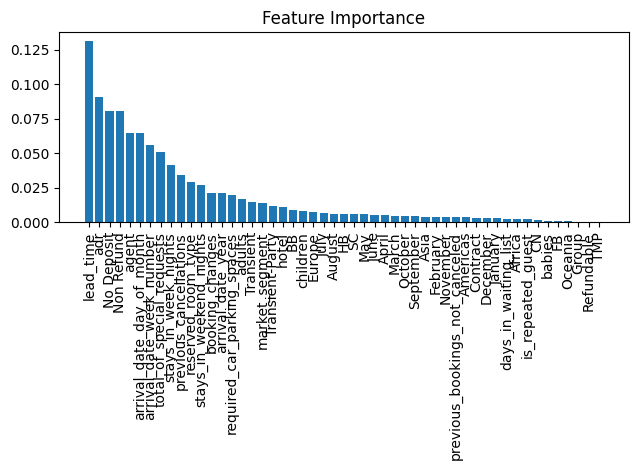

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Feature Importance')
plt.bar(range(x_tr_encoded.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_tr_encoded.shape[1]), x_tr_encoded.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Per ora non abbiamo effettuato tentativi in cui venivano eliminate direttamente feature,
# sicuramente un tentativo è possibile, ad esempio notiamo come tutte le feature dei Continenti evidenziate
# non presentino un impatto troppo grave

# strano è invece come 'days_in_waiting_list', 'previous_booking_not_canceled', e 'is_repeated_guest'
# non influiscano sul risultato; ci sono casi in cui guest abituali cambiano i piani

In [ ]:
# -------------------------------------------------------------------------- SCALING --------------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
x_tr_scaled = scaler.fit_transform(x_tr_encoded)

# SPOSTA NELLA ROUTINE
# x_ts_scaled = scaler.transform(encoded_df_ts)

print("Media distribuzione di partenza: {}".format(np.mean(x_tr_encoded, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_tr_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_tr_encoded, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_tr_scaled, axis=0)))


# print("Media distribuzione di partenza: {}".format(np.mean(encoded_df_ts, axis=0)))
# print("Media distribuzione scalata: {}".format(np.mean(x_ts_scaled, axis=0)))

# print("Deviazione standard distribuzione di partenza: {}".format(np.std(encoded_df_ts, axis=0)))
# print("Deviazione standard distribuzione scalata: {}".format(np.std(x_ts_scaled, axis=0)))

Media distribuzione di partenza: hotel                                    inf
lead_time                         103.491332
arrival_date_week_number           27.218308
arrival_date_day_of_month          15.799940
stays_in_weekend_nights             0.926034
stays_in_week_nights                2.491093
adults                              1.857931
children                            0.104540
babies                              0.008541
market_segment                      0.856286
is_repeated_guest                   0.032548
previous_cancellations              0.086261
previous_bookings_not_canceled      0.142188
reserved_room_type                  0.126797
booking_changes                     0.220836
agent                              76.354932
days_in_waiting_list                2.331060
adr                               101.641854
required_car_parking_spaces         0.062508
total_of_special_requests           0.572343
Africa                              0.009423
Americas              

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
# SOLO PER PROVARE L'OVERSAMPLING
x_tr_oversampled = x_tr_scaled
y_tr_oversampled = y_tr

In [ ]:
# --------------------------------------------------------------------- BALANCING: oversampling ---------------------------------------------------------------------
# data augmentation

# proviamo anche senza, perchè a quanto pare aggiunge davvero TANTO rumore

from imblearn.over_sampling import KMeansSMOTE

print(x_tr_oversampled.shape)

balancer = KMeansSMOTE(sampling_strategy=1, k_neighbors=5, kmeans_estimator=5)
x_tr_oversampled, y_tr_oversampled = balancer.fit_resample(x_tr_oversampled, y_tr_oversampled)

print(x_tr_oversampled.shape)

In [ ]:
# ----------------------------------------------------------- ANOMALY DETECTION CON ISOLATION FOREST -------------------------------------------------------------------
from sklearn.ensemble import IsolationForest

# PER IL MOMENTO SENZA OVERSAMPLING

print("Initial distribution")
print(len(x_tr_scaled))
print(np.unique(y_tr, return_counts=True)[1]/len(y_tr))

anomaly_detector = IsolationForest(n_estimators = 220, bootstrap = True, random_state = 42)
anomaly_detector.fit(x_tr_scaled)
is_inlier = anomaly_detector.predict(x_tr_scaled)

print(np.unique(is_inlier, return_counts=True))
x_tr_not_anomalous = x_tr_scaled[is_inlier==1,:]
y_tr_not_anomalous = y_tr[is_inlier==1]

print("Distribution after (not oversampling and) anomaly detection")
print(len(x_tr_not_anomalous))
print(np.unique(y_tr_not_anomalous, return_counts=True)[1]/len(y_tr_not_anomalous))

In [ ]:
# ------------------------------------------------------------------ BALANCING: undersampling ---------------------------------------------------------------------------------

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

n_classes = len(np.unique(y_tr_not_anomalous))
fig, ax = plt.subplots()
sizes = [len(y_tr_not_anomalous[y_tr_not_anomalous==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

sampler = RandomUnderSampler(sampling_strategy=1)
x_tr_undersampled, y_tr_undersampled = sampler.fit_resample(x_tr_not_anomalous, y_tr_not_anomalous)

print("Size del dataset prima del sampler: {}".format(x_tr_not_anomalous.shape[0]))
print("Size del dataset dopo il sampler: {}".format(x_tr_undersampled.shape[0]))

fig, ax = plt.subplots()
sizes = [len(y_tr_undersampled[y_tr_undersampled==i]) for i in range(n_classes)]
class_names = [chr(ord('A')+i) for i in range(n_classes)]

ax.pie(sizes, labels=class_names, autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis("equal")
plt.show()

In [ ]:
 #preprocessing sul test set

test = x_ts
print(cols)
x_ts_drop = test.drop(columns='company')
x_ts_notnan = imputer.transform(x_ts_drop)
x_ts_notnan = pd.DataFrame(x_ts_notnan)
x_ts_notnan.columns=cols
x_ts_encoded = encoder.transform(x_ts_notnan)
x_ts_encoded = x_ts_encoded.reindex(cols_encoded, axis=1)
x_ts_scaled = scaler.transform(x_ts_encoded)

In [ ]:
import numpy as np
import pandas as pd
import sys

# DA CANCELLARE: NON VA NEL FILE PYTHON
train_file = "hotel_train.csv"

x = pd.read_csv(train_file)
print(x.shape)

(95512, 30)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import KMeansSMOTE
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
def train_evaluate(model, x_tr, y_tr, x_ts, y_ts):
  model.fit(x_tr, y_tr)
  y_tr_pred = model.predict(x_tr)
  y_ts_pred = model.predict(x_ts)
  print("Accuracy on training set {}".format(accuracy_score(y_tr, y_tr_pred)))
  print("F1 score on training set {}".format(f1_score(y_tr, y_tr_pred)))
  print(confusion_matrix(y_tr, y_tr_pred))
  print("Accuracy on test set {}".format(accuracy_score(y_ts, y_ts_pred)))
  print("F1 score on test set {}".format(f1_score(y_ts, y_ts_pred)))
  print(confusion_matrix(y_ts, y_ts_pred))
  return accuracy_score(y_tr, y_tr_pred)

In [ ]:
# --------------------------------------------------------------------- K FOLD CROSS VALIDATION --------------------------------------------------------------------------


from sklearn.model_selection import KFold

sum1 = 0
sum2 = 0
sum3 = 0
n_folds = 10
kf = KFold(n_splits=n_folds, random_state=123, shuffle=True)        # returns a MetadataRequest encapsulating routing information.
for i, (train_index, valid_index) in enumerate(kf.split(x)):
  print(f"Fold {i}:")
  #print(f"  Train: index={train_index}")
  #print(f"  Test:  index={valid_index}")

  x_tr = x.iloc[train_index]     # train set
  valid = x.iloc[valid_index]     # validation set

  # preprocessing pipeline

  # managing null/nan values per row
  x_tr_not = x_tr.dropna(subset=['children'])

  # extracting labels
  y_tr = x_tr_not.pop('is_canceled')

  # managing null/nan values per column
  x_tr_drop = x_tr_not.drop(columns='company')
  cols = list(x_tr_drop)
  imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
  x_tr_notnan = imputer.fit_transform(x_tr_drop)
  x_tr_notnan = pd.DataFrame(x_tr_notnan)
  x_tr_notnan.columns=cols

  #encoding
  encoder = MyEncoder(np.nan)
  x_tr_encoded = encoder.fit_transform(x_tr_notnan)
  cols_encoded = list(x_tr_encoded)

  # feature selection
  #x_tr_selected = x_tr_encoded.drop(columns='Antartica')
  #x_tr_selected = x_tr_selected.drop(columns='Europe')
  #x_tr_selected = x_tr_selected.drop(columns='Africa')
  #x_tr_selected = x_tr_selected.drop(columns='Oceania')
  #x_tr_selected = x_tr_selected.drop(columns='Asia')
  #x_tr_selected = x_tr_selected.drop(columns='Americas')
  x_tr_selected = x_tr_encoded.drop(columns='babies')
  #x_tr_selected = x_tr_selected.drop(columns='Summer')
  #x_tr_selected = x_tr_selected.drop(columns='Spring')
  #x_tr_selected = x_tr_selected.drop(columns='Winter')
  #x_tr_selected = x_tr_selected.drop(columns='Autumn')
  x_tr_selected = x_tr_selected.drop(columns='arrival_date_week_number')
  x_tr_selected = x_tr_selected.drop(columns='arrival_date_day_of_month')

  # scaling
  scaler = RobustScaler()
  x_tr_scaled = scaler.fit_transform(x_tr_selected)

  # balancing: oversampling
  x_tr_oversampled = x_tr_scaled
  y_tr_oversampled = y_tr
  balancer = KMeansSMOTE()
  x_tr_oversampled, y_tr_oversampled = balancer.fit_resample(x_tr_oversampled, y_tr_oversampled)

  # anomaly detection
  anomaly_detector = IsolationForest(n_estimators = 220, bootstrap = True, random_state = 42)
  anomaly_detector.fit(x_tr_scaled)
  is_inlier = anomaly_detector.predict(x_tr_scaled)
  x_tr_not_anomalous = x_tr_scaled[is_inlier==1,:]
  y_tr_not_anomalous = y_tr[is_inlier==1]

  # balancing: undersampling
  sampler = RandomUnderSampler(sampling_strategy=1)
  x_tr_undersampled, y_tr_undersampled = sampler.fit_resample(x_tr_not_anomalous, y_tr_not_anomalous)

  # balancing: solo undersampling senza previa anomaly detection
  x_tr_undersampled2 = x_tr_scaled
  y_tr_undersampled2 = y_tr
  sampler = RandomUnderSampler(sampling_strategy=1)
  x_tr_undersampled2, y_tr_undersampled2 = sampler.fit_resample(x_tr_undersampled2, y_tr_undersampled2)

  # repeating the pipeline on the validation set

  x_ts = valid
  y_ts = x_ts.pop('is_canceled')
  x_ts_drop = x_ts.drop(columns='company')
  x_ts_notnan = imputer.transform(x_ts_drop)
  x_ts_notnan = pd.DataFrame(x_ts_notnan)
  x_ts_notnan.columns=cols
  x_ts_encoded = encoder.transform(x_ts_notnan)
  x_ts_encoded = x_ts_encoded.reindex(cols_encoded, axis=1)
  #x_ts_selected = x_ts_encoded.drop(columns='Antartica')
  #x_ts_selected = x_ts_selected.drop(columns='Europe')
  #x_ts_selected = x_ts_selected.drop(columns='Africa')
  #x_ts_selected = x_ts_selected.drop(columns='Oceania')
  #x_ts_selected = x_ts_selected.drop(columns='Asia')
  #x_ts_selected = x_ts_selected.drop(columns='Americas')
  x_ts_selected = x_ts_encoded.drop(columns='babies')
  #x_ts_selected = x_ts_selected.drop(columns='Summer')
  #x_ts_selected = x_ts_selected.drop(columns='Spring')
  #x_ts_selected = x_ts_selected.drop(columns='Winter')
  #x_ts_selected = x_ts_selected.drop(columns='Autumn')
  x_ts_selected = x_ts_selected.drop(columns='arrival_date_week_number')
  x_ts_selected = x_ts_selected.drop(columns='arrival_date_day_of_month')
  x_ts_scaled = scaler.transform(x_ts_selected)

  # validation
  x_tr = x_tr_undersampled
  y_tr = y_tr_undersampled
  x_ts = x_ts_scaled
  y_ts = y_ts

  #model = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
  #model = GradientBoostingClassifier(max_depth=5, n_estimators=400,loss='exponential')
  #model = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
  #model = MLPClassifier(random_state=123, max_iter=300, batch_size=2000)
  #model = AdaBoostClassifier(n_estimators=200, random_state=123)
  model = RandomForestClassifier(n_estimators=200, min_samples_split=15, max_features='sqrt', criterion='entropy')
  #accuracy1 = train_evaluate(model, x_tr, y_tr, x_ts, y_ts)
  accuracy2 = train_evaluate(model, x_tr_oversampled, y_tr_oversampled, x_ts, y_ts)
  #accuracy3 = train_evaluate(model, x_tr_undersampled2, y_tr_undersampled2, x_ts, y_ts)

  #sum1 = sum1 + accuracy1
  sum2 = sum2 + accuracy2
  #sum3 = sum3 + accuracy3

#print('accuracy1 training : anomaly + under')
#print(sum1/n_folds)
print('accuracy2 training : over')
print(sum2/n_folds)
#print('accuracy3 training : under')
#print(sum3/n_folds)

Fold 0:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9334061034383875
F1 score on training set 0.9312252209219011
[[52166  1885]
 [ 5314 48738]]
Accuracy on test set 0.8686139028475712
F1 score on test set 0.8070121482392743
[[5673  409]
 [ 846 2624]]
Fold 1:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9340913079217888
F1 score on training set 0.9319148936170213
[[52298  1837]
 [ 5299 48837]]
Accuracy on test set 0.8662060301507538
F1 score on test set 0.8075301204819277
[[5593  405]
 [ 873 2681]]
Fold 2:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9334485020370079
F1 score on training set 0.9311781115059804
[[52307  1816]
 [ 5388 48736]]
Accuracy on test set 0.8632603915820333
F1 score on test set 0.8001224364860728
[[5631  379]
 [ 927 2614]]
Fold 3:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9343248308268941
F1 score on training set 0.9321532797985771
[[52337  1823]
 [ 5291 48870]]
Accuracy on test set 0.8676578368757198
F1 score on test set 0.8104379124175166
[[5585  388]
 [ 876 2702]]
Fold 4:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9338793429438403
F1 score on training set 0.9316385204397867
[[52404  1807]
 [ 5362 48850]]
Accuracy on test set 0.8606428646215056
F1 score on test set 0.8010165944087309
[[5541  381]
 [ 950 2679]]
Fold 5:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9345484136451485
F1 score on training set 0.932428304120365
[[52228  1842]
 [ 5236 48835]]
Accuracy on test set 0.8636791958957177
F1 score on test set 0.799074074074074
[[5660  403]
 [ 899 2589]]
Fold 6:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9335058453860727
F1 score on training set 0.9313015000047741
[[52241  1861]
 [ 5334 48769]]
Accuracy on test set 0.8702753638362475
F1 score on test set 0.8110416348940064
[[5653  378]
 [ 861 2659]]
Fold 7:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9344943104737119
F1 score on training set 0.9323007077046335
[[52385  1793]
 [ 5305 48874]]
Accuracy on test set 0.8627368861899277
F1 score on test set 0.8032417829806393
[[5564  391]
 [ 920 2676]]
Fold 8:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9345549980131778
F1 score on training set 0.9323978617793051
[[52292  1814]
 [ 5268 48839]]
Accuracy on test set 0.8676578368757198
F1 score on test set 0.8049984572662758
[[5678  349]
 [ 915 2609]]
Fold 9:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy on training set 0.9335848986802068
F1 score on training set 0.9313342066762925
[[52243  1818]
 [ 5363 48699]]
Accuracy on test set 0.8655638153072976
F1 score on test set 0.8007448789571695
[[5687  385]
 [ 899 2580]]
accuracy2 training : over
0.9339838553366236


In [ ]:
x_tr = x_tr_undersampled
y_tr = y_tr_undersampled
x_ts = x_ts_scaled
y_ts = y_ts

In [ ]:
# -------------------------------------------------------------------- CLASSICATION: SVM -------------------------------------------------------------------------------------

classifier = SVC(kernel='rbf', C = 0.1)
print("Training on scaled data")
train_evaluate(classifier, x_tr, y_tr, x_ts, y_ts)

classifier = SVC(kernel='rbf', C = 0.2)
print("Training on balanced data")
train_evaluate(classifier, x_tr, y_tr, x_ts, y_ts)

classifier = SVC(kernel='rbf', C = 0.1)
print("Training on not anomalous data")
train_evaluate(classifier, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

In [ ]:
# -------------------------------------------------------------- CLASSIFICATION: DECISION TREES -------------------------------------------------------------------------------

classifier = DecisionTreeClassifier(criterion="gini", max_depth=5)
train_evaluate(classifier, x_tr, y_tr, x_ts, y_ts)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier, filled=True)

In [ ]:
# CLASSIFICATION: METODI ENSEMBLE

print("******* GradientBoostingClassifier:")
classifier3 = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
train_evaluate(classifier3, x_tr, y_tr, x_ts, y_ts)

print("******* GradientBoostingClassifier: oversampled")
classifier3 = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
train_evaluate(classifier3, x_tr_oversampled, y_tr_oversampled, x_ts, y_ts)

print("******* GradientBoostingClassifier: not anomalous")
classifier3 = GradientBoostingClassifier(max_depth=5, n_estimators=225,loss='exponential')
train_evaluate(classifier3, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

In [ ]:
print("******* SGDClassifier: ")
classifier4 = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
train_evaluate(classifier4, x_tr, y_tr, x_ts, y_ts)

print("******* SGDClassifier: oversampled")
classifier5 = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
train_evaluate(classifier5, x_tr_oversampled, y_tr_oversampled, x_ts, y_ts)

print("******* SGDClassifier: not anomalous")
classifier6 = SGDClassifier(loss="log_loss", alpha=0.01, penalty=None, random_state=0)
train_evaluate(classifier6, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

In [ ]:
print("******* MLPClassifier: not anomalous")
classifier6 = MLPClassifier(random_state=123, max_iter=300, batch_size=2000)
train_evaluate(classifier6, x_tr_not_anomalous, y_tr_not_anomalous, x_ts, y_ts)

print("******* MLPClassifier: undersampling")
classifier6 = MLPClassifier(random_state=123, max_iter=300, batch_size=2000)
train_evaluate(classifier6, x_tr, y_tr, x_ts, y_ts)

print("******* MLPClassifier: oversampling")
classifier6 = MLPClassifier(random_state=123, max_iter=300, batch_size=2000)
train_evaluate(classifier6, x_tr_oversampled, y_tr_oversampled, x_ts, y_ts)

In [ ]:
# DON'T RUN
assert(len(sys.argv)==3)
train_file, test_file = sys.argv[1:]

In [ ]:
# DON'T RUN
X_test = pd.read_csv(test_file) # will not contain the is_canceled column!
# The following line is only useful to debug the code on the training set:
if "is_canceled" in X_test.columns:
    X_test = X_test.drop(columns=['is_canceled'])

# x[x['agent'].notnull()][x['company'].notnull()]

In [ ]:
# DONT RUN

# la colonna 'country' ha 400 righe vuote, quindi forse serve un imputer
# KNN potrebbe essere utile poichè la colonna è categorica

# però per fare knn dovremmo prima convertire tutti i valori categorici in numerici

from sklearn.impute import KNNImputer

print("KNNImputer")
# per ora uniform, guardando solo i primi 5 vicini
imp = KNNImputer(missing_values=np.nan, n_neighbors=5, weights="uniform")
x_notnan = imp.fit_transform(x)
y_notnan = imp.transform(y)

print(x_notnan[np.isnan(x[:,0]),0][0:10])
print(y_notnan[np.isnan(y[:,0]),0][0:10])
x.info()

In [ ]:
# --------------------------------------------------------------------
predictions = model.predict(X_test)
print("#12345,23456") # nomi o matricole
for i in predictions:
    print(i)

PROVA CODICE FINALE

In [ ]:
# Executed as:
# python deliverable.py <path to training file> <path_to_test_file>
import numpy as np
import pandas as pd
import sys

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import KMeansSMOTE
from sklearn.ensemble import IsolationForest
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import IsolationForest


assert(len(sys.argv)==3)
train_file, test_file = sys.argv[1:]

x_tr = pd.read_csv(train_file)

x_ts = pd.read_csv(test_file) # will not contain the is_canceled column!
# The following line is only useful to debug the code on the training set:
if "is_canceled" in x_ts.columns:
    x_ts = x_ts.drop(columns=['is_canceled'])


# preprocessing

# managing null/nan values per row
x_tr_not = x_tr.dropna(subset=['children'])
# extracting labels
y_tr = x_tr_not.pop('is_canceled')

# managing null/nan values per column
x_tr_drop = x_tr_not.drop(columns='company')
cols = list(x_tr_drop)
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
x_tr_notnan = imputer.fit_transform(x_tr_drop)
x_tr_notnan = pd.DataFrame(x_tr_notnan)
x_tr_notnan.columns=cols

#-------------------------------------------------------------------------- ENCODING --------------------------------------------------------------------------

# The following data was obtained from: https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv
europe = ['ALA', 'ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB', 'GRC', 'GGY', 'VAT', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SJM', 'SWE', 'CHE', 'UKR', 'GBR']
africa = ['DZA', 'AGO', 'BEN', 'BWA', 'IOT', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'COD', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'ATF', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MYT', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'REU', 'RWA', 'SHN', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ESH', 'ZMB', 'ZWE']
asia = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'CYP', 'GEO', 'HKG', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'PRK', 'KOR', 'KWT', 'KGZ', 'LAO', 'LBN', 'MAC', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']
oceania = ['ASM', 'AUS', 'CXR', 'CCK', 'COK', 'FJI', 'PYF', 'GUM', 'HMD', 'KIR', 'MHL', 'FSM', 'NRU', 'NCL', 'NZL', 'NIU', 'NFK', 'MNP', 'PLW', 'PNG', 'PCN', 'WSM', 'SLB', 'TKL', 'TON', 'TUV', 'UMI', 'VUT', 'WLF']
americas = ['AIA', 'ATG', 'ARG', 'ABW', 'BHS', 'BRB', 'BLZ', 'BMU', 'BOL', 'BES', 'BVT', 'BRA', 'CAN', 'CYM', 'CHL', 'COL', 'CRI', 'CUB', 'CUW', 'DMA', 'DOM', 'ECU', 'SLV', 'FLK', 'GUF', 'GRL', 'GRD', 'GLP', 'GTM', 'GUY', 'HTI', 'HND', 'JAM', 'MTQ', 'MEX', 'MSR', 'NIC', 'PAN', 'PRY', 'PER', 'PRI', 'BLM', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'SXM', 'SGS', 'SUR', 'TTO', 'TCA', 'USA', 'URY', 'VEN', 'VGB', 'VIR']
antartica = ['ATA']

class MyEncoder:
  def __init__(self, training_set):
    self.df_training = training_set

  def one_hot_encoding(self, df):

    # creo queste sei categorie e non lascio tutte le nazioni per evitare un numero di feature spropositato
    # solo in seguito procedo con one hot encoding
    df['country'] = df['country'].replace(europe,'Europe')
    df['country'] = df['country'].replace(asia,'Asia')
    df['country'] = df['country'].replace(americas,'Americas')
    df['country'] = df['country'].replace(africa,'Africa')
    df['country'] = df['country'].replace(antartica,'Antartica')
    df['country'] = df['country'].replace(oceania,'Oceania')
    df = pd.concat([df,pd.get_dummies(df['country'])],axis = 1,sort=False)
    df.drop('country', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente due cateogorie per hotel: City Hotel e Resort Hotel
    df['hotel'] = df['hotel'].replace(['City Hotel'], '0')
    df['hotel'] = df['hotel'].replace(['Resort Hotel'], '1')

    # one hot encoding sui 12 mesi dell'anno
    summer = ['June', 'July', 'August']
    autumn = ['September', 'October', 'November']
    winter = ['December', 'January', 'February']
    spring = ['March', 'April', 'May']
    df['arrival_date_month'] = df['arrival_date_month'].replace(summer,'Summer')
    df['arrival_date_month'] = df['arrival_date_month'].replace(autumn,'Autumn')
    df['arrival_date_month'] = df['arrival_date_month'].replace(winter,'Winter')
    df['arrival_date_month'] = df['arrival_date_month'].replace(spring,'Spring')
    df = pd.concat([df,pd.get_dummies(df['arrival_date_month'])],axis = 1,sort=False)
    df.drop('arrival_date_month', axis=1, inplace=True)

    # one hot encoding sull'anno di booking
    df = df.astype({"arrival_date_year": str})
    df = pd.concat([df,pd.get_dummies(df['arrival_date_year'])],axis = 1,sort=False)
    df.drop('arrival_date_year', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente quattro cateogorie per customer_type: Contract, Group, Transient, Transient-party
    df = pd.concat([df,pd.get_dummies(df['customer_type'])],axis = 1,sort=False)
    df.drop('customer_type', axis=1, inplace=True)

    # le specifiche sottolineano che esistono solamente tre cateogorie per customer_type: Refundable, Non Refund, No-deposit
    df = pd.concat([df,pd.get_dummies(df['deposit_type'])],axis = 1,sort=False)
    df.drop('deposit_type', axis=1, inplace=True)

    # dal momento che il motivo per cui la stanza assegnata è differente dalla stanza prenotata
    # potrebbe essere overbooking o richiesta del cliente, l'unica informazione che abbiamo deciso di
    # conservare è se la stanza è stata modificata o meno, riducendo ad una feaure
    # le specifiche sottolineano che esistono solamente due cateogorie per hotel: City Hotel e Resort Hotel
    df['reserved_room_type'] = np.where(df['assigned_room_type'] != df['reserved_room_type'], 1, df['reserved_room_type'])
    df['reserved_room_type'] = np.where(df['assigned_room_type'] == df['reserved_room_type'], 0, df['reserved_room_type'])
    df.rename(columns={"reserved_room_type": "changed_reserved_room"})
    df.drop('assigned_room_type', axis=1, inplace=True)

    # sostituisco nella colonna 'Meal' tutti gli 'Undefined' con 'SC', poichè le specifiche suggeriscono che si tratta
    # della stessa opzione; le categorie totali sono dunque 4: SC (/Undefined), BB, HB, FB
    df['meal'] = df['meal'].replace(['Undefined'], 'SC')
    df = pd.concat([df,pd.get_dummies(df['meal'])],axis = 1,sort=False)
    df.drop('meal', axis=1, inplace=True)

    # nel caso delle colonne market_segment e distribution_channel si hanno meno informazioni,
    # per cui non si è potuto ragionare troppo su come interpretare le due colonne..
    #
    #             ****************** market segment: how you get potential customers to consider buying what you sell *****************
    #             ****************** distribution channel: how you get your products in front of potential customers   ****************
    #
    # fondiamo le due come abbiamo fatto per le stanze reserved e assigned
    df['market_segment'] = np.where(df['distribution_channel'] != df['market_segment'], 1, df['market_segment'])
    df['market_segment'] = np.where(df['distribution_channel'] == df['market_segment'], 0, df['market_segment'])
    #df.rename(columns={"market_segment": "changed_reserved_room"})
    df.drop('distribution_channel', axis=1, inplace=True)

    return  df

  def fit_transform(self, train_set):
    tr_set = self.one_hot_encoding(train_set)
    self.df_training = tr_set
    return self.df_training
  # note: the following method is needed to 'fill' the encoded sets in case of missing features
  def align(self, test_set):
    x_tr_alligned, x_ts_alligned = self.df_training.align(test_set, join="outer", axis=1,fill_value=0)
    #x_ts_alligned = x_ts_alligned.reindex(cols_encoded, axis=1)
    return x_ts_alligned
  def transform(self, test_set):
    test_set = self.one_hot_encoding(test_set)
    test_set = self.align(test_set)   # nel nostro caso specifico non necessario perchè sappiamo di avere tutte le features
    return test_set

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------

#encoding
encoder = MyEncoder(np.nan)
x_tr_encoded = encoder.fit_transform(x_tr_notnan)
cols_encoded = list(x_tr_encoded)

# feature selection
#x_tr_selected = x_tr_encoded.drop(columns='Antartica')
#x_tr_selected = x_tr_selected.drop(columns='Europe')
#x_tr_selected = x_tr_selected.drop(columns='Africa')
#x_tr_selected = x_tr_selected.drop(columns='Oceania')
#x_tr_selected = x_tr_selected.drop(columns='Asia')
#x_tr_selected = x_tr_selected.drop(columns='Americas')
x_tr_selected = x_tr_encoded.drop(columns='babies')
#x_tr_selected = x_tr_selected.drop(columns='Summer')
#x_tr_selected = x_tr_selected.drop(columns='Spring')
#x_tr_selected = x_tr_selected.drop(columns='Winter')
#x_tr_selected = x_tr_selected.drop(columns='Autumn')
x_tr_selected = x_tr_selected.drop(columns='arrival_date_week_number')
x_tr_selected = x_tr_selected.drop(columns='arrival_date_day_of_month')

# scaling
scaler = RobustScaler()
x_tr_scaled = scaler.fit_transform(x_tr_selected)

# balancing: oversampling
x_tr_oversampled = x_tr_scaled
y_tr_oversampled = y_tr
balancer = KMeansSMOTE()
x_tr_oversampled, y_tr_oversampled = balancer.fit_resample(x_tr_oversampled, y_tr_oversampled)

# riporto in seguito altri step della pipeline di preprocessing che sono stati testati e valutati
# anche se alla fine è stata conservata solo la combinazione che riportasse il miglior valore di accuracy

# anomaly detection
#                       anomaly_detector = IsolationForest(n_estimators = 220, bootstrap = True, random_state = 42)
#                       anomaly_detector.fit(x_tr_scaled)
#                       is_inlier = anomaly_detector.predict(x_tr_scaled)
#                       x_tr_not_anomalous = x_tr_scaled[is_inlier==1,:]
#                       y_tr_not_anomalous = y_tr[is_inlier==1]

# balancing: undersampling
#                       sampler = RandomUnderSampler(sampling_strategy=1)
#                       x_tr_undersampled, y_tr_undersampled = sampler.fit_resample(x_tr_not_anomalous, y_tr_not_anomalous)

# balancing: solo undersampling senza previa anomaly detection
#                       x_tr_undersampled2 = x_tr_scaled
#                       y_tr_undersampled2 = y_tr
#                       sampler = RandomUnderSampler(sampling_strategy=1)
#                       x_tr_undersampled2, y_tr_undersampled2 = sampler.fit_resample(x_tr_undersampled2, y_tr_undersampled2)

# repeating the pipeline on the test set

#y_ts = x_ts.pop('is_canceled')
x_ts_drop = x_ts.drop(columns='company')
x_ts_notnan = imputer.transform(x_ts_drop)
x_ts_notnan = pd.DataFrame(x_ts_notnan)
x_ts_notnan.columns=cols
x_ts_encoded = encoder.transform(x_ts_notnan)
x_ts_encoded = x_ts_encoded.reindex(cols_encoded, axis=1)
#x_ts_selected = x_ts_encoded.drop(columns='Antartica')
#x_ts_selected = x_ts_selected.drop(columns='Europe')
#x_ts_selected = x_ts_selected.drop(columns='Africa')
#x_ts_selected = x_ts_selected.drop(columns='Oceania')
#x_ts_selected = x_ts_selected.drop(columns='Asia')
#x_ts_selected = x_ts_selected.drop(columns='Americas')
x_ts_selected = x_ts_encoded.drop(columns='babies')
#x_ts_selected = x_ts_selected.drop(columns='Summer')
#x_ts_selected = x_ts_selected.drop(columns='Spring')
#x_ts_selected = x_ts_selected.drop(columns='Winter')
#x_ts_selected = x_ts_selected.drop(columns='Autumn')
x_ts_selected = x_ts_selected.drop(columns='arrival_date_week_number')
x_ts_selected = x_ts_selected.drop(columns='arrival_date_day_of_month')
x_ts_scaled = scaler.transform(x_ts_selected)


# The following imports are just to underline the different classifiers considered
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree

x_tr = x_tr_oversampled
y_tr = y_tr_oversampled
model = RandomForestClassifier(n_estimators=200, min_samples_split=15, max_features='sqrt', criterion='entropy')
model.fit(x_tr, y_tr)



# --------------------------------------------------------------------
x_ts = x_ts_scaled
predictions = model.predict(x_ts)
print("#0321654,0321669") # nomi o matricole
for i in predictions:
    print(i)

